In [1]:
import math
import pandas_datareader as web
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
import matplotlib.pyplot as plt
plt.style.use('seaborn')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


# its a data collected from bse website starting from 1 july 1998 to 13 july 2020

In [2]:
!wget https://www.dropbox.com/s/lrrymtulw3a6ytb/21%20july.csv?dl=0 -O dataset

--2020-07-23 16:09:45--  https://www.dropbox.com/s/lrrymtulw3a6ytb/21%20july.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/lrrymtulw3a6ytb/21%20july.csv [following]
--2020-07-23 16:09:46--  https://www.dropbox.com/s/raw/lrrymtulw3a6ytb/21%20july.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce57506840c81374b0e54fe7d95.dl.dropboxusercontent.com/cd/0/inline/A8HnG2OoXQxTeX460qHQU_pkdjubk94GHEFwp0TimyLbhEP61Li1WVaxQTS_mmZhXvuu8pbuvElL-UvGFg_clnRZzTfPeubCR9cmcGf0I2XejEfIIGfeDcPcsrAQXTL9mnA/file# [following]
--2020-07-23 16:09:47--  https://uce57506840c81374b0e54fe7d95.dl.dropboxusercontent.com/cd/0/inline/A8HnG2OoXQxTeX460qHQU_pkdjubk94GHEFwp0TimyLbhEP61Li1WVaxQTS_mmZhXvuu8pbuvElL-UvGFg_clnRZzTfPeubCR9cmcGf

In [30]:
df = pd.read_csv('dataset')

In [31]:
df.shape

(5613, 13)

In [32]:
df.head(7)

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,20-July-2020,305.50,310.20,302.40,307.65,307.836227,81839,2114,25193009.0,7272.0,8.89,7.8,2.15
1,17-July-2020,305.00,306.40,300.20,303.80,303.401644,68979,1921,20928342.0,18428.0,26.72,6.2,-1.20
2,16-July-2020,299.95,304.80,290.20,301.15,298.303946,114958,3028,34292425.0,26583.0,23.12,14.6,1.20
3,15-July-2020,302.70,303.80,296.00,299.55,299.838548,137013,3549,41081779.0,28161.0,20.55,7.8,-3.15
4,14-July-2020,315.00,315.25,297.85,302.70,303.930032,118039,3472,35875597.0,22327.0,18.91,17.4,-12.30
5,13-July-2020,316.50,318.00,309.00,311.50,312.205699,87482,2392,27312379.0,21877.0,25.01,9.0,-5.00
6,10-July-2020,320.00,327.55,312.95,315.60,320.337892,111740,2244,35794556.0,29008.0,25.96,14.6,-4.40


In [33]:
df=df.iloc[::-1]

In [34]:
df.head(7)

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
5612,1-January-1998,2372.00,2549.00,2350.00,2450.5,2481.265442,2995,256,7431390.0,NaN,NaN,199.00,78.50
5611,2-January-1998,71.25,72.75,70.25,71.0,71.419979,77580,373,5540762.0,NaN,NaN,2.50,-0.25
5610,5-January-1998,73.00,73.25,70.00,70.0,71.088939,73500,363,5225037.0,NaN,NaN,3.25,-3.00
5609,6-January-1998,70.00,70.50,68.75,70.0,69.535424,51660,327,3592200.0,NaN,NaN,1.75,0.00
5608,7-January-1998,70.00,72.00,69.00,70.0,69.895783,30350,187,2121337.0,NaN,NaN,3.00,0.00
5607,8-January-1998,69.25,69.75,64.75,65.0,67.383648,49290,329,3321340.0,NaN,NaN,5.00,-4.25
5606,9-January-1998,64.75,65.00,62.50,63.5,63.732518,65010,312,4143251.0,NaN,NaN,2.50,-1.25


In [35]:
df.reset_index(drop=True,inplace=True)

In [36]:
df.drop([5612],inplace=True)

In [37]:
df

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,1-January-1998,2372.00,2549.00,2350.00,2450.50,2481.265442,2995,256,7431390.0,NaN,NaN,199.00,78.50
1,2-January-1998,71.25,72.75,70.25,71.00,71.419979,77580,373,5540762.0,NaN,NaN,2.50,-0.25
2,5-January-1998,73.00,73.25,70.00,70.00,71.088939,73500,363,5225037.0,NaN,NaN,3.25,-3.00
3,6-January-1998,70.00,70.50,68.75,70.00,69.535424,51660,327,3592200.0,NaN,NaN,1.75,0.00
4,7-January-1998,70.00,72.00,69.00,70.00,69.895783,30350,187,2121337.0,NaN,NaN,3.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5607,13-July-2020,316.50,318.00,309.00,311.50,312.205699,87482,2392,27312379.0,21877.0,25.01,9.00,-5.00
5608,14-July-2020,315.00,315.25,297.85,302.70,303.930032,118039,3472,35875597.0,22327.0,18.91,17.40,-12.30
5609,15-July-2020,302.70,303.80,296.00,299.55,299.838548,137013,3549,41081779.0,28161.0,20.55,7.80,-3.15
5610,16-July-2020,299.95,304.80,290.20,301.15,298.303946,114958,3028,34292425.0,26583.0,23.12,14.60,1.20


In [38]:
df.head(7)

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,1-January-1998,2372.00,2549.00,2350.00,2450.5,2481.265442,2995,256,7431390.0,NaN,NaN,199.00,78.50
1,2-January-1998,71.25,72.75,70.25,71.0,71.419979,77580,373,5540762.0,NaN,NaN,2.50,-0.25
2,5-January-1998,73.00,73.25,70.00,70.0,71.088939,73500,363,5225037.0,NaN,NaN,3.25,-3.00
3,6-January-1998,70.00,70.50,68.75,70.0,69.535424,51660,327,3592200.0,NaN,NaN,1.75,0.00
4,7-January-1998,70.00,72.00,69.00,70.0,69.895783,30350,187,2121337.0,NaN,NaN,3.00,0.00
5,8-January-1998,69.25,69.75,64.75,65.0,67.383648,49290,329,3321340.0,NaN,NaN,5.00,-4.25
6,9-January-1998,64.75,65.00,62.50,63.5,63.732518,65010,312,4143251.0,NaN,NaN,2.50,-1.25


In [39]:
df.columns

Index(['Date', 'Open Price', 'High Price', 'Low Price', 'Close Price', 'WAP',
       'No.of Shares', 'No. of Trades', 'Total Turnover (Rs.)',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low',
       'Spread Close-Open'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5612 entries, 0 to 5611
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       5612 non-null   object 
 1   Open Price                 5612 non-null   float64
 2   High Price                 5612 non-null   float64
 3   Low Price                  5612 non-null   float64
 4   Close Price                5612 non-null   float64
 5   WAP                        5612 non-null   float64
 6   No.of Shares               5612 non-null   int64  
 7   No. of Trades              5612 non-null   int64  
 8   Total Turnover (Rs.)       5612 non-null   float64
 9   Deliverable Quantity       4573 non-null   float64
 10  % Deli. Qty to Traded Qty  4573 non-null   float64
 11  Spread High-Low            5612 non-null   float64
 12  Spread Close-Open          5612 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage

In [41]:
df.shape

(5612, 13)

In [42]:
df.drop(columns=['Deliverable Quantity','% Deli. Qty to Traded Qty','Date'],inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5612 entries, 0 to 5611
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open Price            5612 non-null   float64
 1   High Price            5612 non-null   float64
 2   Low Price             5612 non-null   float64
 3   Close Price           5612 non-null   float64
 4   WAP                   5612 non-null   float64
 5   No.of Shares          5612 non-null   int64  
 6   No. of Trades         5612 non-null   int64  
 7   Total Turnover (Rs.)  5612 non-null   float64
 8   Spread High-Low       5612 non-null   float64
 9   Spread Close-Open     5612 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 482.3 KB


# making y_train from dataset

In [44]:
dataset=df.values

In [45]:
dataset.shape

(5612, 10)

In [46]:
# here 3 column is the closing price of the stock which we have to predict
dataset[1][3]

71.0

In [47]:
len(dataset)

5612

In [49]:
y_train=[]

for i in range(28,len(dataset)):
    y_train.append(dataset[i,3])
    


In [50]:
y_train=np.array(y_train)
y_train=y_train.reshape(-1,1)
print(y_train.shape)

(5584, 1)


## scaling the data

In [51]:
a=np.array([0,1,2])
a=a.reshape((1,-1))
a

array([[0, 1, 2]])

In [52]:
a.shape

(1, 3)

In [53]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(a)
print(scaled_data)

[[0. 0. 0.]]


In [54]:
pre=scaler.inverse_transform(scaled_data)
print(pre)

[[0. 1. 2.]]


In [55]:
scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))
scaled_data_x=scaler_x.fit_transform(dataset)
scaled_data_y=scaler_y.fit_transform(y_train)

In [56]:
print(scaled_data_x.shape,scaled_data_y.shape)

(5612, 10) (5584, 1)


## making x_train for our dataset

### we have not taken last value in this check loop you will get that last is missed in this loop but it is present in y value

In [57]:
len(scaled_data_x)

5612

In [58]:
x_train=[]

for i in range(28,len(scaled_data_x)):
    x_train.append(scaled_data_x[i-28:i,:])

In [59]:
x_train=np.array(x_train)
print(x_train.shape)

(5584, 28, 10)


In [60]:
scaled_data_y.shape

(5584, 1)

In [61]:
scaled_data_y=scaled_data_y.reshape((-1,))

In [62]:
scaled_data_y.shape

(5584,)

## making test data for tomorrow prediction

In [63]:
test_val=scaled_data_x[-28:,:]

In [64]:
test_val

array([[0.12328155, 0.11685278, 0.12444158, 0.12030478, 0.1186125 ,
        0.01015938, 0.0095234 , 0.00647577, 0.02681992, 0.68407311],
       [0.11896148, 0.11366516, 0.1157646 , 0.11155272, 0.11260051,
        0.02792403, 0.02357474, 0.01696216, 0.07337165, 0.64543081],
       [0.10959779, 0.109547  , 0.11052405, 0.11402389, 0.1088427 ,
        0.01831167, 0.01747111, 0.01078034, 0.0802682 , 0.74290688],
       [0.11842945, 0.11202186, 0.11662371, 0.11433278, 0.11257643,
        0.07359825, 0.04411064, 0.0446973 , 0.04980843, 0.67328111],
       [0.12028091, 0.11247723, 0.11516323, 0.11307661, 0.11312742,
        0.02854779, 0.01768755, 0.01741602, 0.06724138, 0.64751958],
       [0.11385401, 0.11020036, 0.11512027, 0.11157331, 0.11222033,
        0.02836177, 0.02128046, 0.01717431, 0.04559387, 0.68738033],
       [0.11645031, 0.11196246, 0.11774055, 0.11647446, 0.1133138 ,
        0.00904685, 0.00819012, 0.00552772, 0.03927203, 0.7075718 ],
       [0.12151522, 0.11774372, 0.1216065

In [65]:
test_val.shape

(28, 10)

In [66]:
test_val=test_val.reshape((1,test_val.shape[0],test_val.shape[1]))

In [67]:
test_val.shape

(1, 28, 10)

### this is the method to shuffle the data

In [68]:
import random

In [69]:
a=np.arange(27).reshape((3,3,3))
b=np.array([9,8,7])

In [70]:
print(a," \n\n", b)

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]  

 [9 8 7]


In [71]:
print(a.shape,b.shape)

(3, 3, 3) (3,)


In [72]:
combined =list(zip(a,b))

In [73]:
for c in combined:
    print(c)

(array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]]), 9)
(array([[ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17]]), 8)
(array([[18, 19, 20],
       [21, 22, 23],
       [24, 25, 26]]), 7)


In [74]:
random.shuffle(combined)

In [75]:
combined

[(array([[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8]]), 9), (array([[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]), 7), (array([[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]]), 8)]

In [76]:
a,b[:]=zip(*combined)

In [77]:
print(a,"\n\n\n",b)

(array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]]), array([[18, 19, 20],
       [21, 22, 23],
       [24, 25, 26]]), array([[ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17]])) 


 [9 7 8]


In [78]:
a=np.array(a)

In [79]:
a

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]]])

## shuffling our data

In [80]:
combined=list(zip(x_train,scaled_data_y))

In [81]:
random.shuffle(combined)

In [82]:
x_train_shuffled,y_train_shuffled=zip(*combined)

In [83]:
x_train_shuffled=np.array(x_train_shuffled)

In [84]:
x_train_shuffled.shape

(5584, 28, 10)

In [85]:
y_train_shuffled=np.array(y_train_shuffled)

In [86]:



y_train_shuffled.shape

(5584,)

## making our lstm model

In [87]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.1))
model.add(Dense(1,activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 28, 128)           71168     
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 202,881
Trainable params: 202,881
Non-trainable params: 0
_________________________________________________________________


In [88]:

model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [89]:
print(x_train_shuffled.shape,y_train_shuffled.shape)

(5584, 28, 10) (5584,)


In [90]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("best_model.h5",monitor='val_loss',mode='auto',verbose=0,save_best_only=True,period=1)

hist=model.fit(x_train_shuffled,y_train_shuffled,validation_split=0.2,epochs=50,batch_size=32,callbacks=[checkpoint])

Train on 4467 samples, validate on 1117 samples
Epoch 1/50
4467/4467 [==============================] - 26s 6ms/step - loss: 0.0034 - mae: 0.0328 - val_loss: 7.3512e-04 - val_mae: 0.0207
Epoch 2/50
4467/4467 [==============================] - 24s 5ms/step - loss: 8.7946e-04 - mae: 0.0196 - val_loss: 6.1920e-04 - val_mae: 0.0182
Epoch 3/50
4467/4467 [==============================] - 24s 5ms/step - loss: 7.7182e-04 - mae: 0.0183 - val_loss: 4.5231e-04 - val_mae: 0.0131
Epoch 4/50
4467/4467 [==============================] - 24s 5ms/step - loss: 6.8569e-04 - mae: 0.0172 - val_loss: 5.3503e-04 - val_mae: 0.0151
Epoch 5/50
4467/4467 [==============================] - 24s 5ms/step - loss: 7.8108e-04 - mae: 0.0185 - val_loss: 3.7327e-04 - val_mae: 0.0125
Epoch 6/50
4467/4467 [==============================] - 24s 5ms/step - loss: 6.3331e-04 - mae: 0.0166 - val_loss: 6.1315e-04 - val_mae: 0.0182
Epoch 7/50
4467/4467 [==============================] - 24s 5ms/step - loss: 6.9532e-04 - mae: 0.0

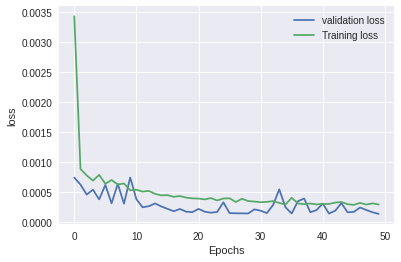

In [91]:
h=hist.history
plt.plot(h['val_loss'],label="validation loss")
plt.plot(h['loss'],label="Training loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

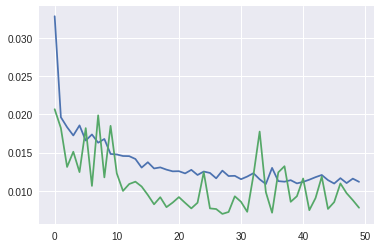

In [92]:
plt.plot(h['mae'])
plt.plot(h['val_mae'])
plt.show()

In [93]:
model.load_weights("best_model.h5")

In [94]:
test_val.shape

(1, 28, 10)

In [95]:
y_predicted=model.predict(test_val)

In [96]:
y_predicted

array([[0.19749908]], dtype=float32)

In [97]:
actual=scaler_y.inverse_transform(y_predicted)

In [98]:
actual

array([[304.49908]], dtype=float32)

# not working as 14 july 2020 closing price is 300